# Bibliotecas

In [2]:
#Python Default 

import warnings

warnings.filterwarnings('ignore', category=DeprecationWarning)

import pickle
import time
import random

#Essentials

import numpy as np
from bs4 import BeautifulSoup
import requests
#import func_timeout
import pandas as pd
#from itables import show
from scipy.optimize import curve_fit

#from objproxies import *

import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

#Qiskit

from qiskit.circuit import Gate
from qiskit.circuit.library import *
from qiskit import transpile
from qiskit.providers.models import *

#from qiskit_     import *
from qiskit.providers.fake_provider import *
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
from qiskit_aer import StatevectorSimulator
import qiskit_aer

## Qiskit Nature
    
from qiskit_nature.units import *   #ANGSTROM

from qiskit_nature.second_q.drivers import *    #PySCFDriver

from qiskit_nature.second_q.mappers import * #JordanWignerMapper

from qiskit_nature.second_q.algorithms import GroundStateEigensolver

from qiskit_nature.second_q.problems import ElectronicStructureProblem
from qiskit_nature.second_q.problems import EigenstateResult

from qiskit_nature.second_q.circuit.library import *  #Ansatz, HF


## Qiskit Algorithms
    
from qiskit_algorithms.minimum_eigensolvers import VQE 
 
from qiskit_algorithms.optimizers import *    #SLSQP

from qiskit_algorithms.optimizers import L_BFGS_B

from qiskit.circuit.library import EfficientSU2   #EfficientSU2

## Qiskit Estimators

from qiskit.primitives import Estimator as Estimator_Nature

from qiskit_aer.primitives.estimator import Estimator as AerEstimator

#from qiskit_ibm_runtime import Estimator 

from qiskit_ibm_runtime import EstimatorV2 as Estimator

## Qiskit Noise Models

from qiskit_aer.noise import NoiseModel

from qiskit.providers.fake_provider import *

##Qiskit Runtime IBM

from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options

## Braket

from braket.tracking import Tracker
from qiskit_braket_provider import *



# Criando circuito para nosso problema de cálculo energético para molécula de hidrogênio - VQE

In [16]:
#Definindo estimator - backend da braket e Mapper Jordan Wigner
    
#from qiskit.primitives import Estimator

seed = 13686003

estimator = AerEstimator(
        backend_options={
            "method": "statevector",
            "coupling_map": None,
            "noise_model": None,
        },
        run_options={"seed": seed, "shots": 1000},
        transpile_options={"seed_transpiler": seed},
        approximation = False
        )

mapper = JordanWignerMapper()

optimizer = L_BFGS_B()



driver = PySCFDriver(
    atom= f"H 0 0 0; H 0 0 0.7",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

hproblem = driver.run()
#print(es_problem)



ansatz = UCCSD(
    hproblem.num_spatial_orbitals,
    hproblem.num_particles,
    mapper,
    initial_state=HartreeFock(
        hproblem.num_spatial_orbitals,
        hproblem.num_particles,
        mapper,
    ),
)

vqe = VQE(estimator, ansatz, optimizer)

vqe.initial_point = [0] * ansatz.num_parameters

calc = GroundStateEigensolver(mapper, vqe)

esr = calc.solve(hproblem) #electronic_structure_result 
print(esr.groundenergy)


-1.8721529754173092


# Modelo com a média de cada número de shots

### Plotando shots x GroundState

2500 pontos, de 1 em 1, até 2500 shots

[-1.87163077]


<Figure size 640x480 with 0 Axes>

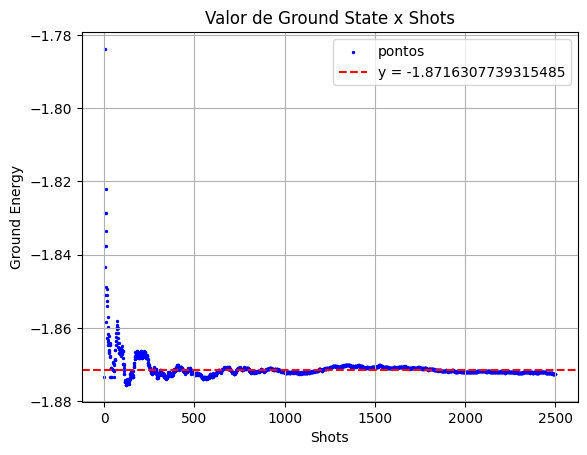

<Figure size 640x480 with 0 Axes>

In [36]:
Plots = []
for n in range(2500):
    Plots.append(n+1)

def test(x, a):
    return a

aj, aj_cov = curve_fit(test, Plots[1500:],Gs[1500:])


print(aj)
points = plt.scatter(Plots,Gs, s=2, color = 'b' )
line = plt.axhline(y = aj, color = 'r', linestyle = '--')
plt.xlabel('Shots')
plt.ylabel('Ground Energy')
plt.title('Valor de Ground State x Shots')
plt.legend((points,line), ('pontos',f'y = {aj[0]}'))
plt.grid()
plt.figure()



1000 pontos, de 10 em 10, até 10000 shots

In [43]:
seed = 13686003
shots = 1
Gs2 = [] #GroundEnergy
for i in range(1000):
    estimator = AerEstimator(
            backend_options={
                "method": "statevector",
                "coupling_map": None,
                "noise_model": None,
            },
            run_options={"seed": seed, "shots": shots},
            transpile_options={"seed_transpiler": seed},
            approximation = False
            )

    mapper = JordanWignerMapper()

    optimizer = L_BFGS_B()



    driver = PySCFDriver(
        atom= f"H 0 0 0; H 0 0 0.7",
        basis="sto3g",
        charge=0,
        spin=0,
        unit=DistanceUnit.ANGSTROM,
    )

    hproblem = driver.run()
    #print(es_problem)



    ansatz = UCCSD(
        hproblem.num_spatial_orbitals,
        hproblem.num_particles,
        mapper,
        initial_state=HartreeFock(
            hproblem.num_spatial_orbitals,
            hproblem.num_particles,
            mapper,
        ),
    )

    vqe = VQE(estimator, ansatz, optimizer)

    vqe.initial_point = [0] * ansatz.num_parameters

    calc = GroundStateEigensolver(mapper, vqe)

    esr = calc.solve(hproblem) #electronic_structure_result 

    Gs2.append(esr.groundenergy)

    shots += 10


<Figure size 640x480 with 0 Axes>

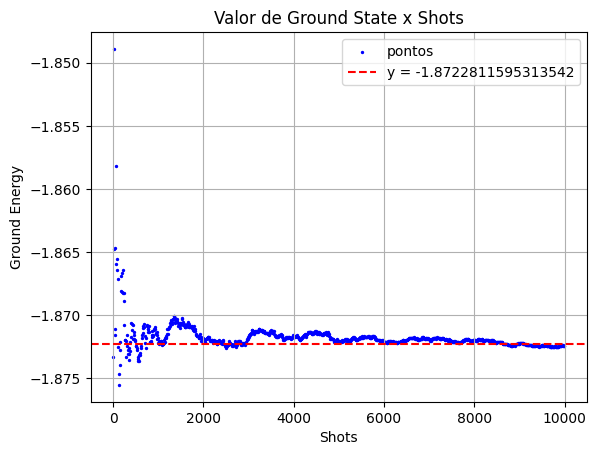

<Figure size 640x480 with 0 Axes>

In [49]:
Plots2 = []
for n in range(1000):
    Plots2.append(n*10)

aj2, aj2_cov = curve_fit(test, Plots2[800:],Gs2[800:])

points = plt.scatter(Plots2,Gs2, s=2, color = 'b' )
line = plt.axhline(y = aj2, color = 'r', linestyle = '--')
plt.xlabel('Shots')
plt.ylabel('Ground Energy')
plt.title('Valor de Ground State x Shots')
plt.legend((points,line), ('pontos',f'y = {aj2[0]}'))
plt.grid()
plt.figure()